<a href="https://colab.research.google.com/github/klarcika/TZ/blob/main/Naloga3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df_rank= pd.read_csv("university_rank_2020.csv",index_col="University", decimal=",")

In [3]:
df_other = pd.read_csv("university_rank_other.csv", sep=" ",index_col=0, decimal=".")

In [4]:
df_student= pd.read_excel("university_rank_students.xlsx",index_col="University", sheet_name=0)

In [5]:
df = pd.concat([df_other, df_rank, df_student], axis=1)

In [6]:
# 1. Izpišite:

# koliko vrstic in stolpcev ima ta združen df,
# kakšnega tipa so posamezni stolpci,
# prvih 5 vrstic in
# koliko je manjkajočih podatkov v posameznem stolpcu.
df.shape

(1396, 13)

In [7]:
df.dtypes

Teaching                     float64
Research                     float64
Citations                    float64
Industry_Income              float64
International_Outlook         object
Country                       object
Number_students               object
Numb_students_per_Staff       object
Score_Result                  object
Rank                           int64
International_Students(%)    float64
Percentage_Female(%)         float64
Percentage_Male(%)           float64
dtype: object

In [ ]:
df[:5]

,Teaching,Research,Citations,Industry_Income,International_Outlook,Country,Number_students,Numb_students_per_Staff,Score_Result,Rank,International_Students(%),Percentage_Female(%),Percentage_Male(%)
University of Oxford,90.5,99.6,98.4,65.5,excellent,United Kingdom,20.664,11.2,95.4,1,41.0,46.0,54.0
California Institute of Technology,92.1,97.2,97.9,88.0,excellent,United States,2.24,6.4,94.5,2,30.0,NaN,66.0
University of Cambridge,91.4,98.7,95.8,59.3,excellent,United Kingdom,18.977999999999998,10.9,94.4,3,37.0,47.0,53.0
Stanford University,92.8,96.4,99.9,66.2,excellent,United States,16.135,7.3,94.3,4,NaN,43.0,57.0
Massachusetts Institute of Technology,90.5,92.4,99.5,86.9,excellent,United States,11.247,8.6,93.6,5,34.0,39.0,61.0


In [8]:
df.isnull().sum()

Teaching                      0
Research                      0
Citations                     0
Industry_Income               0
International_Outlook        11
Country                       0
Number_students               0
Numb_students_per_Staff       0
Score_Result                  0
Rank                          0
International_Students(%)    38
Percentage_Female(%)         36
Percentage_Male(%)           27
dtype: int64

In [9]:
stevilski=["International_Students", "Percentage_Female", "Percentage_Male"]

In [10]:
# 2. Vse manjkajoče vrednosti v številskih stolpcih nadomestite s
# povprečjem stolpca (pri tem si pomagajte s knjižnico sklearn).
#  Ponovno izpišite koliko je manjkajočih podatkov v posameznem stolpcu.
from sklearn.impute import SimpleImputer
import numpy as np
povprecje= SimpleImputer(missing_values=np.nan, strategy="mean")
stevilski = ["International_Students(%)", "Percentage_Female(%)", "Percentage_Male(%)"]
df[stevilski] = povprecje.fit_transform(df[stevilski])
df.isnull().sum()


Teaching                      0
Research                      0
Citations                     0
Industry_Income               0
International_Outlook        11
Country                       0
Number_students               0
Numb_students_per_Staff       0
Score_Result                  0
Rank                          0
International_Students(%)     0
Percentage_Female(%)          0
Percentage_Male(%)            0
dtype: int64

In [11]:
# 3. Kategorične oz. nominalne vrednosti nadomestite z
# najpogostejšimi vrednostmi stolpca (pri tem si pomagajte s knjižnico sklearn).
# Ponovno izpišite koliko je manjkajočih podatkov v posameznem stolpcu.
kategoricni=["International_Outlook"]
najpogostejsi= SimpleImputer(missing_values=np.nan, strategy="most_frequent") #ce dopolnjujemo z stevilskimi, damo most_frequent
df[kategoricni]= najpogostejsi.fit_transform(df[kategoricni])
df.isnull().sum()

Teaching                     0
Research                     0
Citations                    0
Industry_Income              0
International_Outlook        0
Country                      0
Number_students              0
Numb_students_per_Staff      0
Score_Result                 0
Rank                         0
International_Students(%)    0
Percentage_Female(%)         0
Percentage_Male(%)           0
dtype: int64

In [12]:
# 4. Podatke brez manjkajočih vrednosti shranite v .csv
# datoteko poimenovano university_rank_no_nan.csv.
# Stolpci naj bodo ločeni z vejico, decimalna števila pa zapisana s piko.
df.to_csv('university_rank_no_nan.csv', sep=',', decimal='.')

In [13]:
df.dtypes

Teaching                     float64
Research                     float64
Citations                    float64
Industry_Income              float64
International_Outlook         object
Country                       object
Number_students               object
Numb_students_per_Staff       object
Score_Result                  object
Rank                           int64
International_Students(%)    float64
Percentage_Female(%)         float64
Percentage_Male(%)           float64
dtype: object

In [24]:
# 5. Podatke razdelite na učno in testno množico.
# Vhod v vaš klasifikacijski algoritem naj predstavljajo vsi številski stolpci. Napovedovali boste vrednost International_Outlook.
# Testna množica naj bo velikosti 25%, random_state pa 123.
from sklearn.model_selection import train_test_split #y napovedujemo je kategoricen podatek
#dolocimo in izhodne podatke
vhod=df.select_dtypes(exclude=["object"]).columns
print(stevilski)
izhod="Score_Result" #outcome

x_train,x_test, y_train, y_test= train_test_split(df[vhod], df[izhod], test_size=0.2, random_state=123)#radom state je naključna delitev
x_train.shape

['International_Students(%)', 'Percentage_Female(%)', 'Percentage_Male(%)']


(1116, 8)

In [31]:
# 6. Kot klasifikacijski algoritem uporabite odločitveno drevo,
# ki ga naučite na učnimi podatki in nato napovejte rezultat za testno množico.
#  Izpišite prve štiri napovedane vrednosti in točnost napovedi.
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier(random_state=123)
clf.fit(x_train, y_train)

# Napovedi za testno množico
y_pred = clf.predict(x_test)

# Izpišemo prve štiri napovedane vrednosti
print("Prve štiri napovedane vrednosti:", y_pred[:4])

# Izračunamo točnost napovedi
accuracy = metrics.accuracy_score(y_pred, y_test)
print("Točnost napovedi:", accuracy)


Prve štiri napovedane vrednosti: ['13.7' '40.9' '52.4' '46.3']
Točnost napovedi: 0.49642857142857144


In [26]:
# 7. Da preverite kako dobre napovedi je podal zgrajen model izpišite še
# vsaj tri druge metrike s katerimi lahko ovrednotimo rezultate.
# K vsaki uporabljeni metriki dodajte tudi komentar,
# v katerem zapišete kaj nam ta metrika pove.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
rezultat=knn.predict(x_test)
print(metrics.accuracy_score(rezultat, y_test))

0.04285714285714286


In [28]:
#bayes?
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train, y_train)
rezultat2= model.predict(x_test)
print(metrics.accuracy_score(rezultat2, y_test))

0.525


In [39]:
#enega se rabim


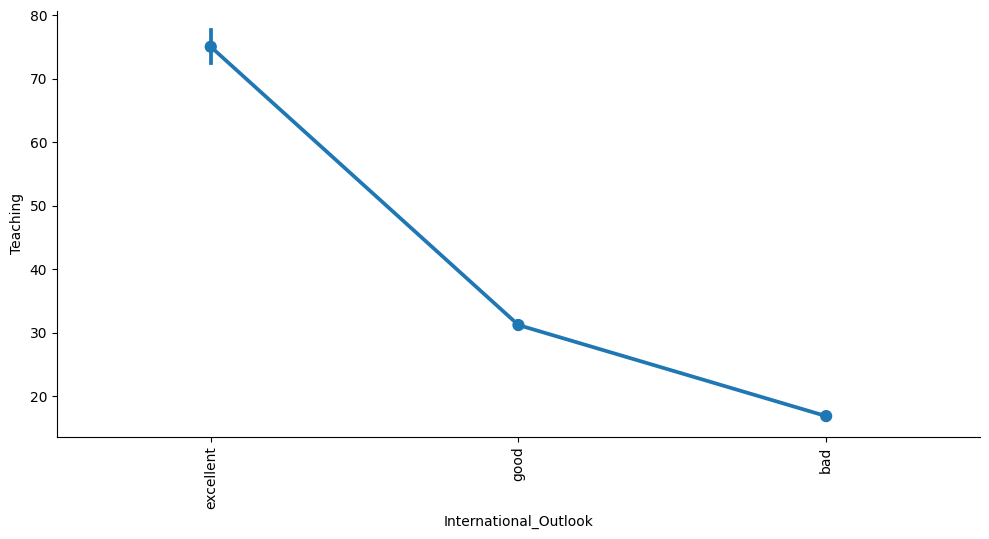

In [40]:
# 8. Izrišite graf, ki bo prikazoval v kakšnem
# razmerju so si vrednosti International_Outlook in Teaching (namig: catplot).
import seaborn as sns
import matplotlib.pyplot as plt

# Predpostavimo, da imate DataFrame df z ustreznimi podatki

# Uporabite catplot za prikaz razmerja med stolpcema International_Outlook in Teaching
sns.catplot(x='International_Outlook', y='Teaching', data=df, kind='point', aspect=2)
plt.xticks(rotation=90)  # Obrnite oznake na x-osi za boljše branje
plt.show()


In [44]:
# 9. Ponovite cel postopek klasifikacije,
# le da zdaj kot vhod uporabite številske podatke brez stolpca Teaching.
# Izpišite kakšna je v tem primeru točnost klasifikacije
from sklearn.model_selection import train_test_split #y napovedujemo je kategoricen podatek
#dolocimo in izhodne podatke
vhod = df.select_dtypes(include='number').drop(columns=['Teaching'])
izhod="Score_Result" #outcome
x_train,x_test, y_train, y_test= train_test_split(vhod, df[izhod], test_size=0.2, random_state=123)#radom state je naključna delitev
x_train.shape
# Ustvarjanje in učenje modela
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
# Napovedovanje vrednosti za testno množico
y_pred = clf.predict(x_test)

# Izračun točnosti klasifikacije
točnost = metrics.accuracy_score(y_test, y_pred)
print("Točnost klasifikacije brez Teaching stolpca:", točnost)

Točnost klasifikacije brez Teaching stolpca: 0.5357142857142857


In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Definirajte vhodne in izhodne spremenljivke
vhod = df.select_dtypes(include='number').drop(columns=['Teaching'])
izhod = df['International_Outlook']

# Seznam klasifikatorjev za preizkus
klasifikatorji = [
    DecisionTreeClassifier(),
    LogisticRegression(max_iter=10000),  # Povečana število iteracij za logistično regresijo
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

# Preizkusite vsak klasifikator s pomočjo navzkrižne validacije
rezultati = {}
for klasifikator in klasifikatorji:
    točnosti = cross_val_score(klasifikator, vhod, izhod, cv=8, scoring='accuracy')
    povprečna_točnost = točnosti.mean()
    ime_klasifikatorja = klasifikator.__class__.__name__
    rezultati[ime_klasifikatorja] = povprečna_točnost

# Izhodna tabela z rezultati
for klasifikator, točnost in rezultati.items():
    print(f"{klasifikator}: {točnost}")


DecisionTreeClassifier: 0.44235221674876846
LogisticRegression: 0.808756157635468
SVC: 0.6590394088669951
KNeighborsClassifier: 0.4496305418719212
GaussianNB: 0.6802216748768473
RandomForestClassifier: 0.48607963875205257
ExtraTreesClassifier: 0.5327709359605911
AdaBoostClassifier: 0.5938013136288999
GradientBoostingClassifier: 0.41873973727422


In [49]:
# 12. Izrišite stolpični graf v katerem prikažete rezultate
# točnosti vsakega klasifikatorja posebej.
# Pazite da bo graf pregleden (bodo vidna imena vseh klasifikatorjev, ...).
import matplotlib.pyplot as plt
rezultati={
  'DecisionTreeClassifier': 0.442,
  'LogisticRegression': 0.809,
  'SVC': 0.659 ,
  'KNeighborsClassifier': 0.450,
  'GaussianNB': 0.680,
  'RandomForestClassifier': 0.486,
  'ExtraTreesClassifier': 0.533,
  'AdaBoostClassifier': 0.594,
  'GradientBoostingClassifier': 0.419,
}
klasifikatorji = list(rezultati.keys())
točnosti = list(rezultati.values())
